## TURBIT Take-Home Assignment

### Practical task :



In [42]:
# All the required libraries are imported

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import typing as t
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import Lasso


## 1. Load the Data :

In [43]:
# Read the input data files

turbine_1_data = pd.read_csv(
    filepath_or_buffer="Turbine1.csv",
    header=[0, 1],
    delimiter=";",
    engine='python',
)
turbine_2_data = pd.read_csv(
    filepath_or_buffer="Turbine2.csv",
    header=[0, 1],
    delimiter=";",
    engine='python'
)

In [44]:
# Load data into pandas DataFrame object

df1 = pd.DataFrame(turbine_1_data)
df2 = pd.DataFrame(turbine_2_data)

In [4]:
# Compare the column headers of both the pandas DataFrames (df1 and df2), to check if they have the same column structure.

df1_headers = list(df1.columns.values)
df2_headers = list(df2.columns.values)
assert df1_headers == df2_headers
print(df1_headers)

[('         Dat/Zeit', '                 '), ('  Wind', '   m/s'), ('Rotor', '  rpm'), ('Leistung', '      kW'), ('Azimut', '     °'), ('   Prod. 1', '       kWh'), ('   Prod. 2', '       kWh'), ('BtrStd 1', '       h'), ('BtrStd 2', '       h'), ('Gen1-', '   °C'), ('Lager', '   °C'), ('Außen', '   °C'), ('GetrT', '   °C'), (' Status', '       '), ('Spann', '    V'), ('Spann', '    V.1'), ('Spann', '    V.2'), ('Strom-', '     A'), ('Strom-', '     A.1'), ('Strom-', '     A.2'), ('CosPh', '     '), ('    Abgabe', '       kWh'), ('     Bezug', '       kWh'), ('  KH-Zähl1', '       Imp'), ('  KH-Zähl2', '       Imp'), ('  KH-DigiE', '       Bit'), ('  KH-DigiI', '       Bit'), ('  KH-Ana-1', '          '), ('  KH-Ana-2', '          '), ('  KH-Ana-3', '          '), ('  KH-Ana-4', '          ')]


## 2. Data Pre-processing :

In [5]:
# Retrieve the first few rows of the DataFrame df1

df1.head()

,Dat/Zeit,Wind,Rotor,Leistung,Azimut,Prod. 1,Prod. 2,BtrStd 1,BtrStd 2,Gen1-,...,Abgabe,Bezug,KH-Zähl1,KH-Zähl2,KH-DigiE,KH-DigiI,KH-Ana-1,KH-Ana-2,KH-Ana-3,KH-Ana-4
,,m/s,rpm,kW,°,kWh,kWh,h,h,°C,...,kWh,kWh,Imp,Imp,Bit,Bit,,,,
0,"01.01.2016, 00:10","5,8",10,"268,5","161,4",31533151,5742941,48371,46008,"14,8",...,0,0,0,0,0,0,0,0,0,0
1,"01.01.2016, 00:20","5,8",10,"268,5","161,4",31533151,5742941,48371,46008,"14,8",...,0,0,0,0,0,0,0,0,0,0
2,"01.01.2016, 00:30","5,8",10,"272,1","160,6",31533151,5742983,48371,46008,"15,9",...,0,0,0,0,0,0,0,0,0,0
3,"01.01.2016, 00:40","6,4",10,"320,1",162,31533151,5743039,48371,46008,"17,7",...,0,0,0,0,0,0,0,0,0,0
4,"01.01.2016, 00:50","6,9","14,5","457,4","161,1",31533206,5743049,48371,46008,20,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# Retrieve the first few rows of the DataFrame df2

df2.head()

,Dat/Zeit,Wind,Rotor,Leistung,Azimut,Prod. 1,Prod. 2,BtrStd 1,BtrStd 2,Gen1-,...,Abgabe,Bezug,KH-Zähl1,KH-Zähl2,KH-DigiE,KH-DigiI,KH-Ana-1,KH-Ana-2,KH-Ana-3,KH-Ana-4
,,m/s,rpm,kW,°,kWh,kWh,h,h,°C,...,kWh,kWh,Imp,Imp,Bit,Bit,,,,
0,"01.01.2016, 00:10","4,2",10,"139,3","161,7",33270717,1712034,48925,45171,"14,5",...,0,0,0,0,0,0,0,0,0,0
1,"01.01.2016, 00:20","4,2",10,"139,3","161,7",33270717,1712034,48925,45171,"14,5",...,0,0,0,0,0,0,0,0,0,0
2,"01.01.2016, 00:30","4,4",10,"162,1","160,8",33270717,1712059,48925,45171,14,...,0,0,0,0,0,0,0,0,0,0
3,"01.01.2016, 00:40","5,4",10,"265,1","161,3",33270717,1712105,48925,45171,"14,8",...,0,0,0,0,0,0,0,0,0,0
4,"01.01.2016, 00:50","5,3",10,"283,8","161,2",33270717,1712147,48925,45172,17,...,0,0,0,0,0,0,0,0,0,0


In [7]:
# Count the missing values in each column of the df1 DataFrame

df1.isna().sum()

         Dat/Zeit                       0
  Wind                m/s               0
Rotor                rpm                0
Leistung                 kW             0
Azimut                  °               0
   Prod. 1                kWh           0
   Prod. 2                kWh           0
BtrStd 1                  h             0
BtrStd 2                  h             0
Gen1-                 °C                0
Lager                 °C                0
Außen                 °C                0
GetrT                 °C                0
 Status                                 0
Spann                  V                0
                       V.1              0
                       V.2              0
Strom-                  A               0
                        A.1             0
                        A.2             0
CosPh                                   0
    Abgabe                kWh           0
     Bezug                kWh           0
  KH-Zähl1                Imp     

In [8]:
# Count the missing values in each column of the df2 DataFrame

df2.isna().sum()

         Dat/Zeit                       0
  Wind                m/s               0
Rotor                rpm                0
Leistung                 kW             0
Azimut                  °               0
   Prod. 1                kWh           0
   Prod. 2                kWh           0
BtrStd 1                  h             0
BtrStd 2                  h             0
Gen1-                 °C                0
Lager                 °C                0
Außen                 °C                0
GetrT                 °C                0
 Status                                 0
Spann                  V                0
                       V.1              0
                       V.2              0
Strom-                  A               0
                        A.1             0
                        A.2             0
CosPh                                   0
    Abgabe                kWh           0
     Bezug                kWh           0
  KH-Zähl1                Imp     

In [9]:
# Select and extract these two specific columns from the two DataFrames
# Convert the data from these columns into Python lists, this data will be used further.

inputs1_raw = df1[('  Wind', '   m/s')].tolist()
outputs1_raw = df1[('Leistung', '      kW')].tolist()

inputs2_raw = df2[('  Wind', '   m/s')].tolist()
outputs2_raw = df2[('Leistung', '      kW')].tolist()

In [10]:
# Convert decimal numbers represented as 'comma as the decimal separator' to 'dot as the decimal separator'

def convert_decimals_separator_to_dot(
    data: t.Sequence[str]
) -> np.ndarray:
    return np.array(
        [float(elt.replace(",", ".")) for elt in data]
    ).astype(np.float32)

convert_decimals_separator_to_dot(data=["1.1", "-0.3"])

array([ 1.1, -0.3], dtype=float32)

In [11]:
# Preprocessing input and output data by converting the decimal separator format from commas to dots

inputs1 = convert_decimals_separator_to_dot(data=inputs1_raw)
outputs1 = convert_decimals_separator_to_dot(data=outputs1_raw)

inputs2 = convert_decimals_separator_to_dot(data=inputs2_raw)
outputs2 = convert_decimals_separator_to_dot(data=outputs2_raw)

print(inputs1.shape, inputs1.dtype)

(13103,) float32


In [12]:
# Check the distributions of the two inputs,
# Since the two ranges overlap, it is likely that the two files contain data coming from the same distribution (or Turbine).

print(f"Turbine 1 inputs moments: mean={np.mean(inputs1)} and std={np.std(inputs1)}")
print(f"Turbine 2 inputs moments: mean={np.mean(inputs2)} and std={np.std(inputs2)}")


Turbine 1 inputs moments: mean=5.788376331329346 and std=2.8135483264923096
Turbine 2 inputs moments: mean=5.741105556488037 and std=2.8873848915100098


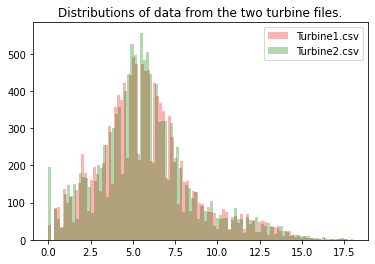

In [13]:
# Visualizing inputs distribution from file 1 and file2
# Visualizations confirm the above observation of matching distributions


plt.hist(inputs1, color="red", bins=100, alpha=0.3, label="Turbine1.csv")
plt.hist(inputs2, color="green", bins=100, alpha=0.3, label="Turbine2.csv")
plt.title("Distributions of data from the two turbine files.")
plt.legend()
plt.show()


In [14]:
# Combine input and output data from multiple files into a single dataset
# Further split and create training and testing sets from that dataset

def get_data_splits(
    list_of_inputs_from_files: t.Sequence[np.ndarray],
    list_of_outputs_from_files: t.Sequence[np.ndarray],
) -> t.Tuple[
    np.ndarray, np.ndarray, np.ndarray,
    np.ndarray, np.ndarray, np.ndarray,
]:
   

    # Merge the two datasets into one
    inputs = np.concatenate([list_of_inputs_from_files[0], list_of_inputs_from_files[1]])
    total_count = inputs.shape[0]  # SHAPE: [26206, ]
    outputs = np.concatenate([list_of_outputs_from_files[0], list_of_outputs_from_files[1]])  # SHAPE: [26206, ]

    # Define percentages of different splits
    train_split_percentage = 0.8
    test_split_percentage = 0.2

    # Compute sizes of different splits
    train_split_count = int(train_split_percentage * total_count)
    test_split_count = total_count - train_split_count

    # Get indices for train, valid, and test splits
    idxs = [idx for idx in range(total_count)]
    np.random.shuffle(idxs)  # This shuffles indices IN PLACE
    train_idxs: t.Sequence[int] = idxs[:train_split_count]
    test_idxs: t.Sequence[int] = idxs[train_split_count:]

    # Generate splits from indices
    X_train_split = inputs[train_idxs]
    X_test_split = inputs[test_idxs]

    y_train_split = outputs[train_idxs]
    y_test_split = outputs[test_idxs]

    # Normalize data
    MEAN, STD = X_train_split.mean(), X_train_split.std()
    X_train_split = (X_train_split - MEAN)/STD
    X_test_split = (X_test_split - MEAN)/STD

    return (
        X_train_split, y_train_split,
        X_test_split, y_test_split,
    )

In [15]:
# We choose the Mean Squared Error(MSE) metric for evaluation of model performance

def mse_metric(target: np.ndarray, pred: np.ndarray) -> float:

    return np.mean((target - pred)**2)

mse_metric(np.array([1, 2]), np.array([2, 3]))

1.0

In [16]:
# Convert data to match LinearRegression input expectation
# Shapes of splits: [batch_size, ]. Desired shape for LinearRegression: [batch_size, num_features]
# In our case, we have num_features=1 and so, let's reshape data.

X_train, y_train, X_test, y_test = get_data_splits(
    list_of_inputs_from_files=[inputs1, inputs2],
    list_of_outputs_from_files=[outputs1, outputs2],
)

X_train = X_train.reshape([-1, 1])
X_test = X_test.reshape([-1, 1])

## 3. Model Selection : Using a single feature

Model Selection is done using 5-fold Cross-validation, the following four regression models are used.


In [17]:
lr = LinearRegression(fit_intercept=True, copy_X=True)
scores = cross_validate(lr, X_train, y_train, cv=5, scoring=('neg_mean_squared_error'), return_train_score=True)
print('Mean Train Score: {}, Mean Test Score: {}'.format(np.mean(scores['train_score']), np.mean(scores['test_score'])))

Mean Train Score: -24513.719140625, Mean Test Score: -24518.55


In [18]:
rfr = RandomForestRegressor()
scores = cross_validate(rfr, X_train, y_train, cv=5, scoring=('neg_mean_squared_error'), return_train_score=True)
print('Mean Train Score: {}, Mean Test Score: {}'.format(np.mean(scores['train_score']), np.mean(scores['test_score'])))

Mean Train Score: -3058.5358646582918, Mean Test Score: -3151.2458268123596


In [19]:
nn1 = MLPRegressor()
scores = cross_validate(nn1, X_train, y_train, cv=5, scoring=('neg_mean_squared_error'), return_train_score=True)
print('Mean Train Score: {}, Mean Test Score: {}'.format(np.mean(scores['train_score']), np.mean(scores['test_score'])))

c:\users\amruta\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
c:\users\amruta\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
c:\users\amruta\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Mean Train Score: -4436.477734375, Mean Test Score: -4460.0373046875


c:\users\amruta\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [20]:
l = Lasso()
scores = cross_validate(l, X_train, y_train, cv=5, scoring=('neg_mean_squared_error'), return_train_score=True)
print('Mean Train Score: {}, Mean Test Score: {}'.format(np.mean(scores['train_score']), np.mean(scores['test_score'])))

Mean Train Score: -24514.719921875, Mean Test Score: -24519.505859375


##### The Linear Regression model is the baseline as it is one of the simplest models used for regression
##### The model with the best mean MSE cross-validation score is RandomForestRegressor


In [21]:
# Train the RandomForestRegressor (best model) on the complete training dataset and obtain the MSE train score

model = RandomForestRegressor()
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)


# Compute metric
test_metric = mse_metric(target=y_test, pred=y_test_pred)

print("Random Forest Performance:")
print(f"Test Score: {test_metric}")

Random Forest Performance:
Test Score: 3356.7832877287833


## 4. Model Selection : Additional sensor data (features)

Now, we will consider additional sensor data and check the results.

In [22]:
# Read and load the input data files

turbine_1_data = pd.read_csv(
    filepath_or_buffer="Turbine1.csv",
    header=[0, 1],
    delimiter=";",
    engine='python',
)
turbine_2_data = pd.read_csv(
    filepath_or_buffer="Turbine2.csv",
    header=[0, 1],
    delimiter=";",
    engine='python'
)

df1 = pd.DataFrame(turbine_1_data)
df2 = pd.DataFrame(turbine_2_data)

# Check if the column names of df1 and df2 are identical
assert list(df1.columns.values) == list(df2.columns.values)

# Store the identical column names in the headers variable and print them
headers = list(df1.columns.values)
print(headers)

[('         Dat/Zeit', '                 '), ('  Wind', '   m/s'), ('Rotor', '  rpm'), ('Leistung', '      kW'), ('Azimut', '     °'), ('   Prod. 1', '       kWh'), ('   Prod. 2', '       kWh'), ('BtrStd 1', '       h'), ('BtrStd 2', '       h'), ('Gen1-', '   °C'), ('Lager', '   °C'), ('Außen', '   °C'), ('GetrT', '   °C'), (' Status', '       '), ('Spann', '    V'), ('Spann', '    V.1'), ('Spann', '    V.2'), ('Strom-', '     A'), ('Strom-', '     A.1'), ('Strom-', '     A.2'), ('CosPh', '     '), ('    Abgabe', '       kWh'), ('     Bezug', '       kWh'), ('  KH-Zähl1', '       Imp'), ('  KH-Zähl2', '       Imp'), ('  KH-DigiE', '       Bit'), ('  KH-DigiI', '       Bit'), ('  KH-Ana-1', '          '), ('  KH-Ana-2', '          '), ('  KH-Ana-3', '          '), ('  KH-Ana-4', '          ')]


In [23]:
outputs1_raw = df1[df1.columns[3]].tolist()
outputs2_raw = df2[df2.columns[3]].tolist()

df1.drop(df1.columns[3], axis=1, inplace=True)
df2.drop(df2.columns[3], axis=1, inplace=True)

In [24]:
# Display the contents of df1 dataframe

df1

,Dat/Zeit,Wind,Rotor,Azimut,Prod. 1,Prod. 2,BtrStd 1,BtrStd 2,Gen1-,Lager,...,Abgabe,Bezug,KH-Zähl1,KH-Zähl2,KH-DigiE,KH-DigiI,KH-Ana-1,KH-Ana-2,KH-Ana-3,KH-Ana-4
,,m/s,rpm,°,kWh,kWh,h,h,°C,°C,...,kWh,kWh,Imp,Imp,Bit,Bit,,,,
0,"01.01.2016, 00:10","5,8",10,"161,4",31533151,5742941,48371,46008,"14,8","53,4",...,0,0,0,0,0,0,0,0,0,0
1,"01.01.2016, 00:20","5,8",10,"161,4",31533151,5742941,48371,46008,"14,8","53,4",...,0,0,0,0,0,0,0,0,0,0
2,"01.01.2016, 00:30","5,8",10,"160,6",31533151,5742983,48371,46008,"15,9","53,7",...,0,0,0,0,0,0,0,0,0,0
3,"01.01.2016, 00:40","6,4",10,162,31533151,5743039,48371,46008,"17,7",54,...,0,0,0,0,0,0,0,0,0,0
4,"01.01.2016, 00:50","6,9","14,5","161,1",31533206,5743049,48371,46008,20,"57,2",...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13098,"31.03.2016, 23:10","5,2",10,"359,1",32300592,5866558,49430,46892,"16,2","51,8",...,1595,71,0,0,0,0,0,0,0,0
13099,"31.03.2016, 23:20","5,3",10,"359,7",32300592,5866593,49430,46892,17,"52,3",...,1595,71,0,0,0,0,0,0,0,0
13100,"31.03.2016, 23:30","5,2",10,"0,3",32300592,5866632,49430,46892,17,52,...,1595,71,0,0,0,0,0,0,0,0


In [25]:
# Display the contents of the output file
outputs1_raw

['268,5',
 '268,5',
 '272,1',
 '320,1',
 '457,4',
 '577,1',
 '661,1',
 '514,4',
 '449,3',
 '636,3',
 '560',
 '593,9',
 '499,8',
 '313,3',
 '274,8',
 '276',
 '302',
 '335',
 '373,1',
 '348,2',
 '315,1',
 '319,4',
 '332,8',
 '413,1',
 '382,2',
 '230,3',
 '412,6',
 '476,5',
 '538,8',
 '345,2',
 '293',
 '282,8',
 '212,3',
 '193,4',
 '187,5',
 '178,3',
 '169,4',
 '102,5',
 '102',
 '116,5',
 '125,4',
 '107,6',
 '136,8',
 '123,4',
 '123,5',
 '170,9',
 '166,3',
 '146,2',
 '131,8',
 '101,4',
 '117,1',
 '93,7',
 '79,4',
 '95',
 '74,6',
 '86,6',
 '76,2',
 '65,4',
 '112,8',
 '161',
 '85,8',
 '25,5',
 '22,5',
 '37,7',
 '40,7',
 '28,8',
 '10,7',
 '-4,4',
 '2,3',
 '0,1',
 '0',
 '0',
 '0',
 '0',
 '0,2',
 '0',
 '0,1',
 '0,1',
 '-0,1',
 '0,1',
 '0,4',
 '0',
 '0',
 '0,2',
 '0,2',
 '0,2',
 '0,2',
 '0',
 '0',
 '0,1',
 '0,5',
 '0',
 '0',
 '0,2',
 '0,4',
 '0,1',
 '0,6',
 '0,2',
 '0,2',
 '0,6',
 '0,6',
 '0,1',
 '0',
 '0,2',
 '0,2',
 '0,1',
 '0,2',
 '0',
 '0,2',
 '0,1',
 '0',
 '0,1',
 '0,1',
 '0',
 '0',
 '0,1'

In [26]:
# Print all the columns containing commas

def columns_with_commas_values(df):
    columns_with_commas = []
    for column in df.columns:
        if df[column].astype(str).str.contains(',').any():
            columns_with_commas.append(column)
    return columns_with_commas

print(columns_with_commas_values(df1))

[('         Dat/Zeit', '                 '), ('  Wind', '   m/s'), ('Rotor', '  rpm'), ('Azimut', '     °'), ('Gen1-', '   °C'), ('Lager', '   °C'), ('Außen', '   °C'), ('GetrT', '   °C'), ('Spann', '    V'), ('Spann', '    V.1'), ('Spann', '    V.2'), ('Strom-', '     A'), ('Strom-', '     A.1'), ('Strom-', '     A.2'), ('CosPh', '     ')]


In [27]:
# Replace the commas with dots

def convert_decimals_separator_to_dot(
    data: t.Sequence[str]
) -> np.ndarray:
    return np.array(
        [float(elt.replace(",", ".")) for elt in data]
    ).astype(np.float32)

In [28]:
# Convert the numeric values with commas as decimal separators, to dots as decimal separators

columns_df1 = columns_with_commas_values(df1)[1:]
columns_df2 = columns_with_commas_values(df2)[1:]

for column in columns_df1:
    df1[column] = convert_decimals_separator_to_dot(df1[column]).tolist()
    
for column in columns_df2:
    df2[column] = convert_decimals_separator_to_dot(df2[column]).tolist()

In [29]:
# Convert the strings into a NumPy array of 32-bit floating-point numbers with dots as decimal separators.

outputs1 = convert_decimals_separator_to_dot(data=outputs1_raw)
outputs2 = convert_decimals_separator_to_dot(data=outputs2_raw)

In [30]:
# Display the contents of the dataframe

df1

,Dat/Zeit,Wind,Rotor,Azimut,Prod. 1,Prod. 2,BtrStd 1,BtrStd 2,Gen1-,Lager,...,Abgabe,Bezug,KH-Zähl1,KH-Zähl2,KH-DigiE,KH-DigiI,KH-Ana-1,KH-Ana-2,KH-Ana-3,KH-Ana-4
,,m/s,rpm,°,kWh,kWh,h,h,°C,°C,...,kWh,kWh,Imp,Imp,Bit,Bit,,,,
0,"01.01.2016, 00:10",5.8,10.0,161.399994,31533151,5742941,48371,46008,14.800000,53.400002,...,0,0,0,0,0,0,0,0,0,0
1,"01.01.2016, 00:20",5.8,10.0,161.399994,31533151,5742941,48371,46008,14.800000,53.400002,...,0,0,0,0,0,0,0,0,0,0
2,"01.01.2016, 00:30",5.8,10.0,160.600006,31533151,5742983,48371,46008,15.900000,53.700001,...,0,0,0,0,0,0,0,0,0,0
3,"01.01.2016, 00:40",6.4,10.0,162.000000,31533151,5743039,48371,46008,17.700001,54.000000,...,0,0,0,0,0,0,0,0,0,0
4,"01.01.2016, 00:50",6.9,14.5,161.100006,31533206,5743049,48371,46008,20.000000,57.200001,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13098,"31.03.2016, 23:10",5.2,10.0,359.100006,32300592,5866558,49430,46892,16.200001,51.799999,...,1595,71,0,0,0,0,0,0,0,0
13099,"31.03.2016, 23:20",5.3,10.0,359.700012,32300592,5866593,49430,46892,17.000000,52.299999,...,1595,71,0,0,0,0,0,0,0,0
13100,"31.03.2016, 23:30",5.2,10.0,0.300000,32300592,5866632,49430,46892,17.000000,52.000000,...,1595,71,0,0,0,0,0,0,0,0


In [31]:
# Display the resulting NumPy array

outputs1

array([268.5, 268.5, 272.1, ..., 209.9, 220.5, 274.1], dtype=float32)

In [32]:
# Combine input and output data from multiple files into a single dataset

# Further split and create training and testing sets from that dataset

def get_data_splits(
    list_of_inputs_from_files: t.Sequence[np.ndarray],
    list_of_outputs_from_files: t.Sequence[np.ndarray],
) -> t.Tuple[
    np.ndarray, np.ndarray, np.ndarray,
    np.ndarray, np.ndarray, np.ndarray,
]:

    # Merge the two datasets into one.
    inputs = np.concatenate([list_of_inputs_from_files[0], list_of_inputs_from_files[1]])
    total_count = inputs.shape[0] 
    outputs = np.concatenate([list_of_outputs_from_files[0], list_of_outputs_from_files[1]])  

    # Define percentages of different splits.
    train_split_percentage = 0.8
    test_split_percentage = 0.2

    # Compute sizes of different splits.
    train_split_count = int(train_split_percentage * total_count)
    test_split_count = total_count - train_split_count

    # Get indices for train, valid, and test splits.
    idxs = [idx for idx in range(total_count)]
    np.random.shuffle(idxs) 
    train_idxs: t.Sequence[int] = idxs[:train_split_count]
    test_idxs: t.Sequence[int] = idxs[train_split_count:]

    # Generate splits from indices.
    X_train_split = inputs[train_idxs]
    X_test_split = inputs[test_idxs]

    y_train_split = outputs[train_idxs]
    y_test_split = outputs[test_idxs]
    
    dates_train = X_train_split[:, 0]
    dates_test = X_test_split[:, 0]
    
    X_train_split = X_train_split[:, 1:]
    X_test_split = X_test_split[:, 1:]

    # Normalize data
    MEAN, STD = X_train_split.mean(), X_train_split.std()
    X_train_split = (X_train_split - MEAN)/STD
    X_test_split = (X_test_split - MEAN)/STD

    return (
        X_train_split, y_train_split,
        X_test_split, y_test_split,
        dates_train, dates_test
    )

In [33]:
complete_X_train, complete_y_train, complete_X_test, complete_y_test, dates_train, dates_test = get_data_splits(
    list_of_inputs_from_files=[df1, df2],
    list_of_outputs_from_files=[outputs1, outputs2],
)

In [34]:
# For the regression, we track L2 difference between predictions and the ground truth target
# float value of the metric is returned


def mse_metric(target: np.ndarray, pred: np.ndarray) -> float:

    return np.mean((target - pred)**2)

mse_metric(np.array([1, 2]), np.array([2, 3]))

1.0

###### Model Selection is done using 5-fold Cross-validation, the following four regression models are used.

###### NOTE : The MLPRegressor model might take a few extra minutes for the results.

In [35]:
lr = LinearRegression(fit_intercept=True, copy_X=True)
scores = cross_validate(lr, complete_X_train, complete_y_train, cv=5, scoring=('neg_mean_squared_error'), return_train_score=True)
print('Mean Train Score: {}, Mean Test Score: {}'.format(np.mean(scores['train_score']), np.mean(scores['test_score'])))

Mean Train Score: -351.9474747523743, Mean Test Score: -353.9801512168215


In [36]:
rfr = RandomForestRegressor()
scores = cross_validate(rfr, complete_X_train, complete_y_train, cv=5, scoring=('neg_mean_squared_error'), return_train_score=True)
print('Mean Train Score: {}, Mean Test Score: {}'.format(np.mean(scores['train_score']), np.mean(scores['test_score'])))

Mean Train Score: -28.35272653734977, Mean Test Score: -198.88490683161757


In [37]:
nn1 = MLPRegressor()
scores = cross_validate(nn1, complete_X_train, complete_y_train, cv=5, scoring=('neg_mean_squared_error'), return_train_score=True)
print('Mean Train Score: {}, Mean Test Score: {}'.format(np.mean(scores['train_score']), np.mean(scores['test_score'])))

Mean Train Score: -223383.69602529652, Mean Test Score: -223389.5823687197


In [38]:
l = Lasso()
scores = cross_validate(l, complete_X_train, complete_y_train, cv=5, scoring=('neg_mean_squared_error'), return_train_score=True)
print('Mean Train Score: {}, Mean Test Score: {}'.format(np.mean(scores['train_score']), np.mean(scores['test_score'])))

Mean Train Score: -223468.58535384596, Mean Test Score: -223493.38399712957


##### LinearRegression model is used as a baseline as it is one of the simple models which is used for regression
##### The model with the best mean MSE cross-validation score is RandomForestRegressor

In [39]:
# Train the RandomForestRegressor (best model) on the complete training dataset and obtain the MSE test score

model = RandomForestRegressor()
model.fit(complete_X_train, complete_y_train) 
complete_y_test_pred = model.predict(complete_X_test)

# Compute metric
test_metric = mse_metric(target=complete_y_test, pred=complete_y_test_pred)
print("RandomForestRegressor Performance:")
print(f"Test Metric: {test_metric}")

RandomForestRegressor Performance:
Test Metric: 191.3544181588229


## 5. Anomaly Detection

In [40]:
# Calculate the residuals, and set a threshold for anomaly detection.
# Further reshape arrays as needed, and identify anomalies based on the residuals exceeding the threshold.
# Threshold calculates the standard deviation of the residuals and then multiplies it by a constant.
# The threshold is used to identify values that deviate significantly from the expected behavior. 
# Any residuals exceeding this threshold will be considered as an anomaly.

residuals = abs(complete_y_test - complete_y_test_pred)

k = 6
threshold = np.std(residuals) * k

residuals = np.reshape(residuals, (residuals.size, 1))
dates_test = np.reshape(dates_test, (dates_test.size, 1))

complete_X_test = np.hstack((dates_test, residuals))

anomalies = complete_X_test[complete_X_test[:, -1] > threshold]

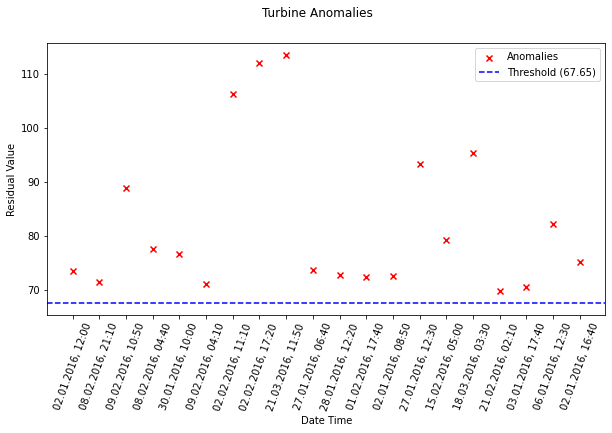

In [41]:
# Listing the time frames and visualizing anomalies

time = anomalies[:, -2]
values = anomalies[:, -1]

plt.figure(figsize=(10, 5))
plt.scatter(time, values, color='red', marker='x', label='Anomalies')

plt.axhline(y=threshold, color='b', linestyle='--', label='Threshold ({})'.format(round(threshold, 2)))

plt.suptitle('Turbine Anomalies')
plt.xlabel('Date Time')
plt.ylabel('Residual Value')
plt.legend()
plt.xticks(rotation=70)
plt.show()